In [441]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score

In [442]:
# loading data
data = load_boston()
df = pd.DataFrame(np.c_[data.data,data.target], columns= np.append(data.feature_names,["MEDV"]))

In [443]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [444]:
# Check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

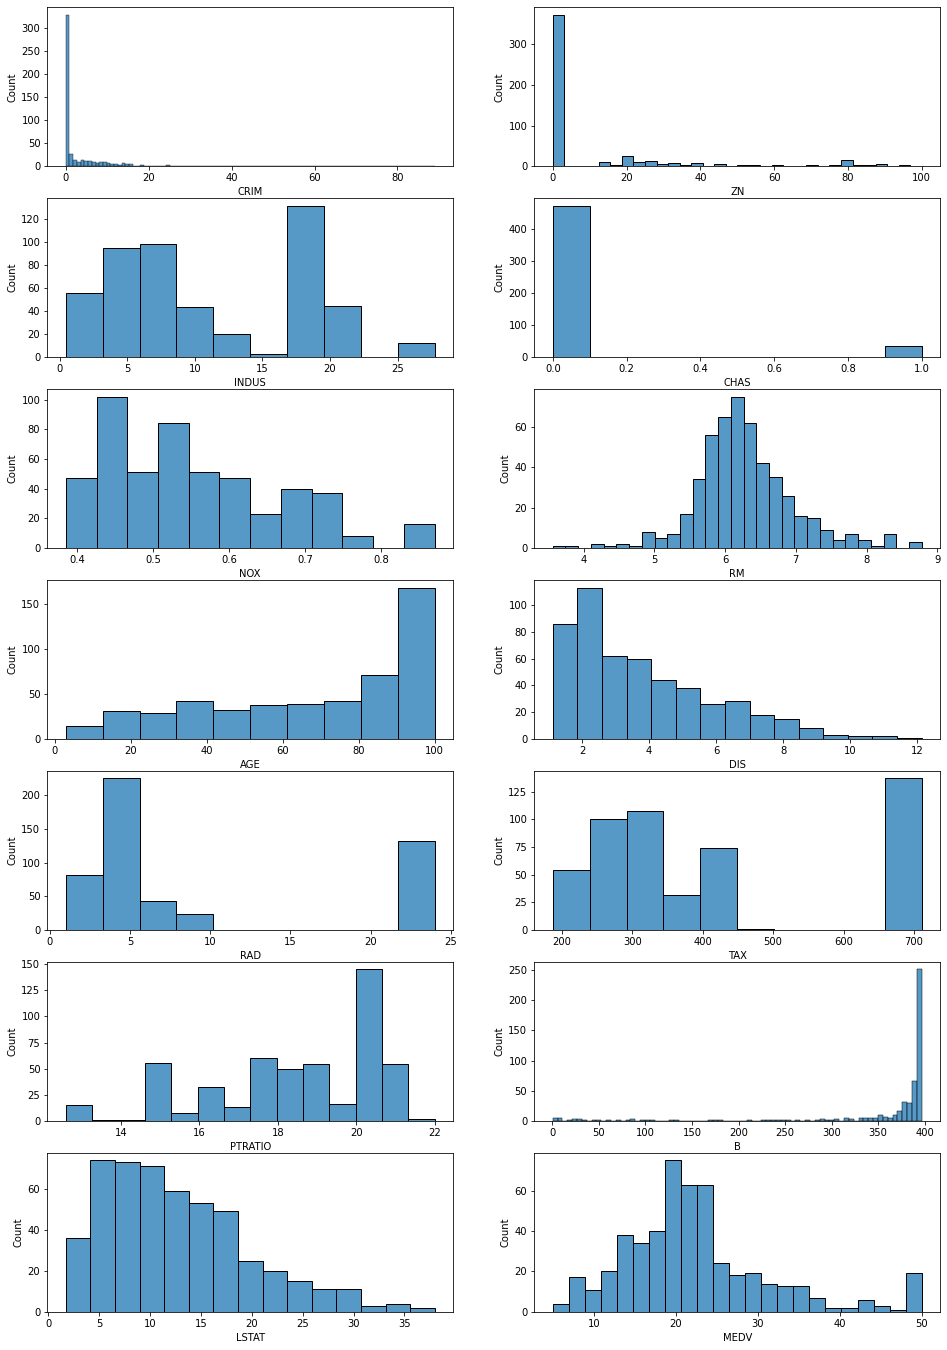

In [445]:
# Check distribution of each variable
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.histplot(df[i],ax=ax)

As we can see not all variables are normally distributed which is a problem. But our target variable is normally distributed. 

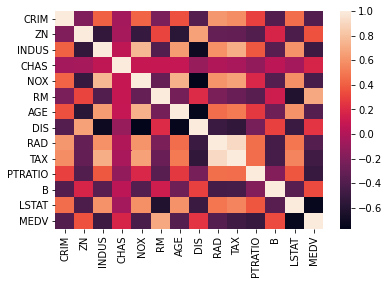

In [446]:
#check colinearity
sns.heatmap(df.corr())

From above heatmap we can see that our target variable is highly dependent on LSTAT and RM variables. But we can also see high mulitconlinearity among few variables. For e.g. RAD and TAX.

In [447]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [448]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [449]:
# Feature Scaling
scaler = StandardScaler()
# Fit only on train data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [450]:
# Principal Component Analysis
# PCA is used for removing multicolinearity from the data
pca = PCA(n_components=13)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

#variance ratio displays ratio of data represented by individual components
print(pca.explained_variance_ratio_)

[0.46811316 0.10889369 0.09792857 0.07092232 0.06258996 0.05250644
 0.04188396 0.02933387 0.02160891 0.01539709 0.01356302 0.0123837
 0.0048753 ]


Reason for fitting scaler and PCA only on Train data is because we should not let test data influence the Train data. 

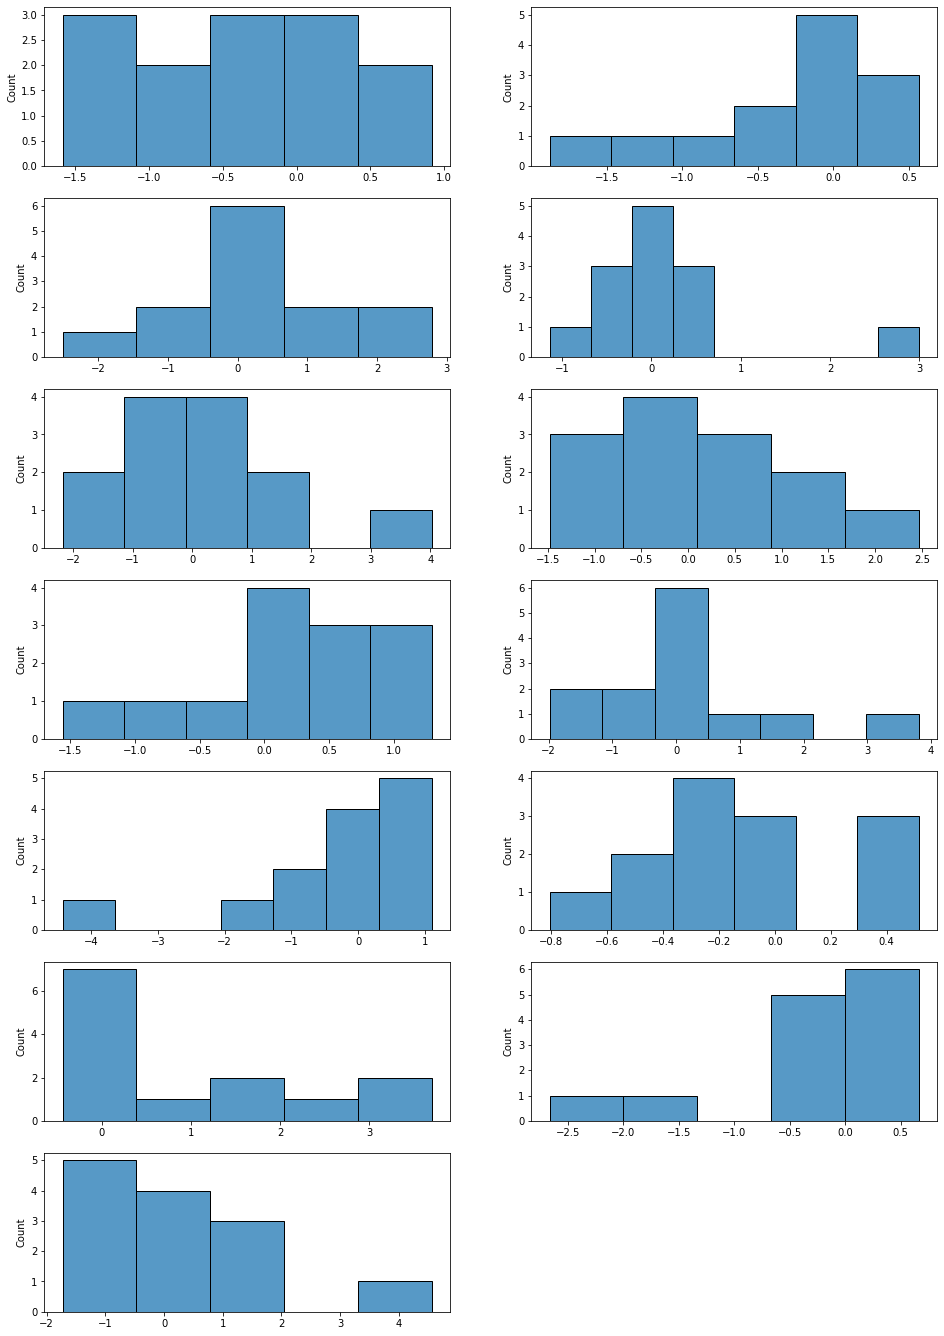

In [451]:
#Lets see if PCA normalized the data
# Check distribution of each variable
pos = 1
fig = plt.figure(figsize=(16,24))
for i in range(13):
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.histplot(X_pca_train[i],ax=ax)

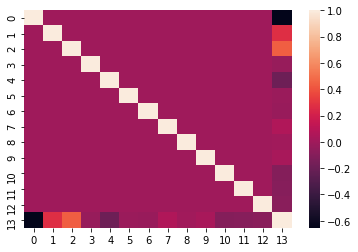

In [452]:
# Lets see if PCA removed multicolinearity
pca_df = pd.DataFrame(np.c_[X_pca_train,y_train])
sns.heatmap(pca_df.corr())

PCA solved the problem of multicolinearity

In [453]:
# Model Fitting and Model prediction on Train data
lm = LinearRegression()
lm.fit(X_pca_train, y_train)
y_pred = lm.predict(X_pca_train)
print("rmse:",np.sqrt(mean_squared_error(y_train, y_pred)))
print("r2 score:",r2_score(y_train, y_pred))

rmse: 4.4317625644779355
r2 score: 0.7697699488741148


In [454]:
# Model prediction on Test data
lm = LinearRegression()
lm.fit(X_pca_train, y_train)
y_pred = lm.predict(X_pca_test)
print("rmse:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:",r2_score(y_test, y_pred))

rmse: 5.457311159564054
r2 score: 0.6354638433202129
